<a href="https://colab.research.google.com/github/NoelleI/Pigmentation/blob/master/Melanoma_with_CDNN_Pigmentation_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma with CNN

This analysis trains a neural network to perform segmentation on melanoma data and then applies the algorithm to segment a pigmentation lesion

This line clones the github repository so that data may be accessed and the file can be saved there

!git clone https://github.com/NoelleI/Pigmentation.git

This mounts Google Drive to access the ~10G melanoma photo data sets

1.   List item
2.   List item



from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import os
%matplotlib inline
# First, load the image
#dir_path = os.path.dirname(os.path.realpath(__file__))
filename = "./pigmentation.png"

# Load the image
pigment_image = mpimg.imread(filename)

# Print out its shape
print(pigment_image.shape)


(689, 898, 3)


In [2]:
pwd

'C:\\Users\\Admin\\Documents\\Pigmentation\\Pigmentation'

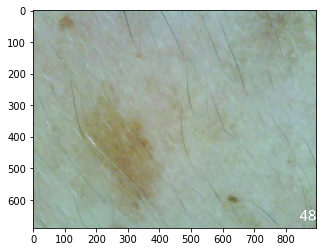

In [3]:
import matplotlib.pyplot as plt
plt.imshow(pigment_image)
plt.show()

In [4]:
pigment_image.shape

(689, 898, 3)

In [5]:
import skimage
pigment_image_resized = skimage.transform.resize(pigment_image, (192,256,3))


C:\Users\Admin\Anaconda2\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Admin\Anaconda2\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [6]:
##note: in order to discern the melanin content, it will be necessary to understand how this resizing algorithm works: does it take a maximum value? What does it use?

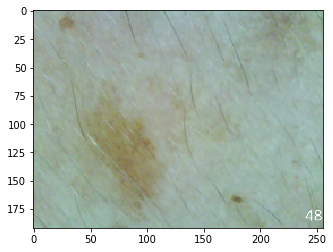

In [7]:
plt.imshow(pigment_image_resized)
plt.show()

In [8]:
type(pigment_image)

numpy.ndarray

In [ ]:
import numpy as np
pigment_image_show = pigment_image_resized
pigment_image_resized = np.reshape(pigment_image_resized, [1,192,256,3])

In [ ]:
import scipy
scipy.__version__

'1.0.0'

In [ ]:
!pip install pillow

In [ ]:
if not (scipy.__version__ == '1.0.0'):
  !pip uninstall scipy==1.3.0
  !pip install scipy==1.0.0

In [ ]:
from scipy import ndimage, misc
import re
import os
#get pigmentation photos
pigs = []
for root, dirnames, filenames in os.walk("./Pigmentation_photos/Experiment 1/Spot 4"): 
    for filename in filenames:
        if re.search('d*.PNG', filename):
            filepath = os.path.join(root, filename)
            pig = ndimage.imread(filepath)
            pig_resized = skimage.transform.resize(pig, (192,256,3))  #redo this size or re-size later in Tensorflow
            pigs.append(pig_resized)
            #filename = filename.split(".")
            #name = filename[0] + "2." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #misc.imsave(new_path, _seg_resized)
            #os.remove(filepath)
            #f.close()
pigs = np.array(pigs)

C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
filenames 

['0-0--09-22-pm.PNG',
 '1-1--09-23-am.PNG',
 '10--09-30-pm.PNG',
 '11--10-02-pm.PNG',
 '12--10-04-pm.PNG',
 '13--10-06-am.PNG',
 '14--10-10-am.PNG',
 '15--10-11-pm.PNG',
 '16--10-12-pm.PNG',
 '17--10-13-am.PNG',
 '18--10-14-am.PNG',
 '19--10-16-pm.PNG',
 '2--09-23-pm.PNG',
 '20--10-18-pm.PNG',
 '21--10-120-pm.PNG',
 '22--10-25-am.PNG',
 '23--10-28-pm.PNG',
 '24--11-04-am.PNG',
 '25--11-06-pm.PNG',
 '26--11-10-am.PNG',
 '27--11-11-pm.PNG',
 '3--09-25-am.PNG',
 '4--09-25-pm.PNG',
 '5--09-27-pm.PNG',
 '6--09-28-am.PNG',
 '7--09-28-pm.PNG',
 '8--09-29-am.PNG',
 '9--09-29-pm.PNG']

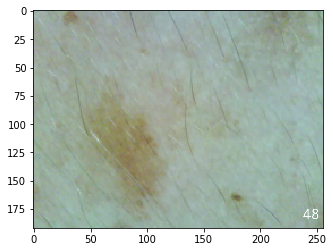

In [ ]:
plt.imshow(pigs[0])


In [ ]:
## I created a train-test split in the original upload of files to Google Docs, but I will merge these because I've realized that I can still use train-test split below and it will 
## randomize the photos each time

In [ ]:

from skimage import data
from skimage.color import rgb2hsv, rgb2lab

In [ ]:
from scipy import ndimage, misc
import re
import os
#there are 2594 photos
images = []
for root, dirnames, filenames in os.walk("C:\\Users\\Admin\\Documents\\Pigmentation\\ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            #print(filename)
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            
            image = misc.imresize(image, (192,256,3))  #redo this size or re-size later in Tensorflow ->STORE resized images later
            images.append(image)

            
            
images = np.array(images)

C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  del sys.path[0]


In [ ]:
images.shape

In [ ]:
image = images[2580,:,:,:]
rotate_image = ndimage.rotate(image, 45)
rotate_image = misc.imresize(rotate_image, (192,256,6))
plt.imshow(rotate_image)
plt.show()

***The images look blurry***

In [ ]:
image = images[0,:,:,:]
plt.imshow(image)
plt.show()

In [ ]:
filepath

In [ ]:
image.shape

In [ ]:
image = ndimage.imread(filepath, mode="RGB")
plt.imshow(image)
plt.show()

In [ ]:
#C:/Users\Admin\Documents\Skin Depth\Leads and Projects\Melanoma Challenge\2018\ISIC2018_Task1_Training_GroundTruth\ISIC2018_Task1_Training_GroundTruth
segs = []
files = []
for root, dirnames, filenames in os.walk("C:\\Users\\Admin\\Documents\\Pigmentation\\ISIC2018_Task1_Training_GroundTruth"):  #"/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #C:/Users/Admin/Documents/Skin Depth/Leads and Projects/Melanoma Challenge/2018/ISIC2018_Task1_Training_GroundTruth/ISIC2018_Task1_Training_GroundTruth"): 
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
            print(filename)
            files.append(filename)
            filepath = os.path.join(root, filename)
            seg = ndimage.imread(filepath, mode="L")
            seg_resized = misc.imresize(seg, (192,256,1))
            segs.append(seg_resized)

segs = np.array(segs)


**Check some features of the data to be sure that it uploaded properly**

In [ ]:
segs.shape


In [ ]:
len(files)

In [ ]:
segs[-1].shape

In [ ]:
image = segs[2593,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = images[2593,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = segs[1000,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = images[1000,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = segs[1,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = images[1,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = segs[0,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = images[0,:,:]
plt.imshow(image)
plt.show()

It looks like the segmentation labels are aligned with the feature images

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [ ]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.05) #this is randomized each time the program is started and run from scratch

In [ ]:
trainim.shape

In [ ]:
np.max(testlab)

In [ ]:
testlab.shape

In [ ]:
image = trainlab[5,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = trainim[5,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = testlab[5,:,:]
plt.imshow(image)
plt.show()

In [ ]:
image = testim[5,:,:]
plt.imshow(image)
plt.show()

it looks like the images and labels are still aligned after train-test split

In [ ]:
def data_augmentations(features,lables,flag):  #flag will be used to indicate whether or not the data should be augmented or not
    if flag:
        print("treat the first input image")
        hsv_img = rgb2hsv(features[0])  #add 3 hsv channels       
        plt.imshow(features[0])
        plt.show()
        plt.imshow(hsv_img)
        plt.show()
        l = rgb2lab(features[0])[:,:,0].reshape(192,256,1) #add the l channel from the lab space
        image = np.concatenate((features[0],hsv_img,l), axis =2)  #concatenate into one big image
        x2 = image.reshape([1,192,256,7])  #need to add "1" to first dimension for future concatenation
        image = x2
        print("#flip the first image:")
        flip_ud_x2 = np.flipud(x2)
        plt.imshow(flip_ud_x2[0,:,:,:3])
        plt.show()
        x2 = np.vstack((x2, flip_ud_x2)) 
    
        print("#rotate the first image by a random angle")
        ra = np.random.random()*360
        rotate_x2 = ndimage.rotate(image, ra)
        print("test1")
        rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,7))
        plt.imshow(rotate_x2[0,:,:,:3])
        plt.show()
        print("test2")
        x2 = np.vstack((x2, rotate_x2 )) 

        print("#treat the first label:")
        label = lables[0]
        plt.imshow(label)
        plt.show()
        y2 = label.reshape([1,192,256,1])
        print("#flip the first label to match the first input image:")
        flip_ud_y2 = np.flipud(y2)
        y2 = np.vstack((y2, flip_ud_y2)) 
        plt.imshow(flip_ud_y2[0:,:,:,:])
        plt.show()
        print("#rotate the label by the same angle as the image")
        rotate_y2 = ndimage.rotate(label, ra)
        rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
        y2 = np.vstack((y2, rotate_y2)) 
        plt.imshow(rotate_y2) 
        plt.show()

        i = 1

        print('#treat the subsequent images and labels')
        for image in features[1:]:
          print(i)
          plt.imshow(image)
          plt.show()
          hsv_img = rgb2hsv(image)  #add 3 hsv channels       
          plt.imshow(hsv_img)
          plt.show()
          l = rgb2lab(image)[:,:,0].reshape(192,256,1) #add the l channel from the lab space
          image = np.concatenate((image,hsv_img,l), axis =2)  #concatenate into one big image
          image = image.reshape([1,192,256,7])  #need to add "1" to first dimension for future concatenation
      
          x2 = np.vstack((x2, image))
          print('#flip the image:')
          flip_ud_x2 = np.flipud(image)
          x2 = np.vstack((x2, flip_ud_x2))
          plt.imshow(flip_ud_x2[1,:,:,:3])
          plt.show()

          print('#rotate the image by a random angle')
          ra = np.random.random()*360
          rotate_x2 = ndimage.rotate(image, ra)
          rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,7))
          x2 = np.vstack((x2, rotate_x2))
          plt.imshow(rotate_x2[0,:,:,:3])
          plt.show()


          print('#treat the corresponding label:')
          label = lables[i].reshape([1,192,256,1])
          plt.imshow(label)
          plt.show()

          y2 = np.vstack((y2,label))
          print('#flip the corresponding label to match the input image:')
          flip_ud_y2 = np.flipud(label)
          y2 = np.vstack((y2,flip_ud_y2))
          plt.imshow(flip_ud_y2[0,:,:,:])
          plt.show()


          print('#rotate the label by the same angle as the image')
          rotate_y2 = ndimage.rotate(label, ra)
          rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
          y2 = np.vstack((y2,rotate_y2))
          plt.imshow(rotate_y2) 
          plt.show()

          print('#scale images to 0-1 interval')
        x2 = x2/255
        y2 = y2/255
    else:
        x2 = features
        y2 = lables
    
    return x2, y2
    
  

In [ ]:
data_augmentations(testim, testlab, 0)

In [ ]:
tf.test.is_gpu_available(
    cuda_only=True,
    min_cuda_compute_capability=None
)

In [ ]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
       
        self.training_images = trainim   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
       
        self.training_labels = np.around(trainlab) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        
        
        
      
        self.test_images, labls = data_augmentations(testim, testlab,0)
        self.test_labels = labls.reshape((labls.shape[0],192,256))
       
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100 - this is now a mistake
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<batch_size and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3)  #why is this necessary?
            y = np.vstack((self.training_labels[self.i:self.i+batch_size], self.training_labels[0:xtra]))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3)  #why is this necessary?
            y = self.training_labels[self.i:self.i+batch_size]
        x,y = data_augmentations(x,y,0)
        y = y.reshape((y.shape[0],192,256))
        self.i = xtra 
        return x, y

In [ ]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [ ]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [ ]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [ ]:
def deconv2d(x, shape):
    return tf.layers.conv2d_transpose(x, shape[3], shape[0:2], padding = 'SAME')

In [ ]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [ ]:
def convolutional_layer(input_x, shape):
    if input_x.shape[0]==1:
      training = False
    else: training = True
    W = init_weights(shape)
    b = init_bias([shape[3]])
    c = conv2d(input_x, W) + b   ###put batch normalization here because it should include the weights
    bnc = tf.layers.batch_normalization(c, training = training)
    return tf.nn.relu(bnc)

This is a normal fully connected layer

In [ ]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [ ]:
def deconvolutional_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    bnd = tf.layers.batch_normalization(d, training = training)
    return tf.nn.relu(bnd)

In [ ]:
def output_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    
    return tf.nn.sigmoid(d)

### Placeholders

In [ ]:
x = tf.placeholder(tf.float32,shape=[None,192,256,3])  #trace the shaping of these through the code...


In [ ]:

y_true = tf.placeholder(tf.float32,shape=[None,192,256])  #this now has every pixel in the ground truth segmentation

### Layers

In [ ]:
x_image = tf.reshape(x,[-1,192,256,3])  #-1 infers the shape of the first dimension (here, the batch size)

In [ ]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,3,16])
convo_12 = convolutional_layer(convo_1,shape=[3,3,16,32])
convo_1_pooling = max_pool_2by2(convo_12)

In [ ]:
print(convo_1_pooling.shape)

In [ ]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,32,64])
convo_22 = convolutional_layer(convo_2,shape=[3,3,64,64])
convo_2_pooling = max_pool_2by2(convo_22)

In [ ]:
print(convo_2_pooling.shape)

In [ ]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
## You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_32 = convolutional_layer(convo_3,shape=[3,3,128,128])
convo_3_pooling = max_pool_2by2(convo_32)

In [ ]:
print(convo_3_pooling.shape)

In [ ]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
hold_prob = tf.placeholder(tf.float32)

convo_3_pooling_d = tf.nn.dropout(convo_3_pooling,keep_prob=hold_prob)


convo_4 = convolutional_layer(convo_3_pooling_d,shape=[3,3,128,256])
convo_42 = convolutional_layer(convo_4,shape=[3,3,256,256])
convo_4_pooling = max_pool_2by2(convo_42)

In [ ]:
print(convo_4_pooling.shape)

In [ ]:
convo_5 = convolutional_layer(convo_4_pooling,shape=[3,3,256,512])
#convo_5_pooling = max_pool_2by2(convo_5)

In [ ]:
print(convo_5.shape)

In [ ]:
#convo_6 = convolutional_layer(convo_5,shape=[3,3,128,256])
#convo_6_pooling = max_pool_2by2(convo_6)

In [ ]:
#print(convo_6.shape)

###Need to look at the shapes and sizes of all of these layers###

In [ ]:
#import keras
deconv_1 = deconvolutional_layer(convo_5, shape = [3,3,512,256])
H = deconv_1.shape[1]
W = deconv_1.shape[2]
ups_1 = tf.image.resize_nearest_neighbor(deconv_1, size = [2*H,2*W])
print(ups_1.shape)

In [ ]:
deconv_2 = deconvolutional_layer(ups_1, shape = [3,3,256,256])
deconv_22 = deconvolutional_layer(deconv_2, shape = [3,3,256,128])
H = deconv_22.shape[1]
W = deconv_22.shape[2]
ups_2 = tf.image.resize_nearest_neighbor(deconv_22, size = [2*H,2*W])
print(ups_2.shape)

In [ ]:
deconv_3 = deconvolutional_layer(ups_2, shape = [4,4,128,128])
deconv_32 = deconvolutional_layer(deconv_3, shape = [3,3,128,128])
H = deconv_32.shape[1]
W = deconv_32.shape[2]
ups_3 = tf.image.resize_nearest_neighbor(deconv_32, size = [2*H,2*W])
print(ups_3.shape)

In [ ]:
deconv_4 = deconvolutional_layer(ups_3, shape = [3,3,128,64])
deconv_42 = deconvolutional_layer(deconv_4, shape = [3,3,64,32])
H = deconv_42.shape[1]
W = deconv_42.shape[2]
ups_4 = tf.image.resize_nearest_neighbor(deconv_42, size = [2*H,2*W])
print(ups_4.shape)

In [ ]:
hold_prob2 = tf.placeholder(tf.float32)

ups_4_d = tf.nn.dropout(ups_4,keep_prob=hold_prob2)

deconv_5 = deconvolutional_layer(ups_4_d, shape = [3,3,32,16])
print(deconv_5.shape)
output = output_layer(deconv_5, shape = [3,3,16,1])
#print(deconv_52.shape)
#output = tf.image.resize_nearest_neighbor(deconv_52, size = [192,256])   #not sure what sort of output layer is used in the winning submission

In [ ]:
deconv_5.shape

In [ ]:
y_pred = output

### Loss Function

In [ ]:
pred = tf.reshape(y_pred, [-1,192,256])
true = tf.reshape(y_true, [-1,192,256])
          

intersect = tf.reduce_sum(tf.cast(true*pred, tf.float32), axis = [1,2])
sum_pred = tf.reduce_sum(tf.cast(pred*pred, tf.float32), axis = [1,2])
sum_true = tf.reduce_sum(tf.cast(true*true, tf.float32), axis = [1,2])
union = sum_pred + sum_true - intersect  
jacc = intersect/union
            


#cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=pred))

This will be updated to a loss function based on the jaccard index, as in the related publication

### Optimizer

In [ ]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
cost = -tf.reduce_mean(tf.nn.sigmoid(jacc))
train = optimizer.minimize(cost)   #can this be done for each pixel?

### Intialize Variables

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
saver = tf.train.Saver()

### Session

In [ ]:
mel = MelHelper()
mel.set_up_images()

In [ ]:
tf.math.exp(1.)

In [ ]:
steps = 75815
import time
batch_size = 16
j_test = []
j_train = []

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    print("starting init")
    sess.run(init)
    print("done init")
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        #print(i)
        #print("\n")
        
        #print("batch training labels shape is ", batch_y.shape)
        #print("batch training labels type is ", batch_y.dtype)
        #print("batch training labels are ", batch_y)
        #print("batch training data are ", batch_x)
        #image = batch_y.reshape(-1,21,28)[5,:,:]
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5,hold_prob2:0.5})
        #print("batch training prediction are ", batch_y)
        #image_pred = sess.run(y_pred,feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0} ).reshape(-1,21,28)[5,:,:]
        #image_pred = np.round(1/(1 + np.exp(-image_pred)))
        
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print("the time is ", time.clock() - start_time, "\n")
             #print("mel i is ", mel.i)
             #plt.imshow(image)
             #plt.show()
             #plt.imshow(image_pred)
             #plt.show()
            
            #print('Currently on step {}'.format(i))
            #print('Accuracy is:')
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            #acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            
            ####use with cross entropy####
            #pred = tf.round(1/(1 + tf.exp(-tf.reshape(y_pred, [-1,48,64]))))
            #true = tf.reshape(y_true, [-1,48,64])
          
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))  ###REPLACE THIS LINE TO INCLUDE JACARD INDEX####
            pred_o = tf.math.round(pred)
            true_o = tf.math.round(true)
            
        


            intersect_o = tf.reduce_sum(tf.cast(true*pred_o, tf.float32), axis = [1,2])
            union_o = tf.reduce_sum(tf.cast(pred_o, tf.float32), axis = [1,2]) + tf.reduce_sum(tf.cast(true, tf.float32), axis = [1,2]) - intersect_o  #think this has an error
            jacc_o = intersect_o/union_o
            
            
            J_out = sess.run([jacc_o],feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0,hold_prob2:1.0})
            J_train = np.sum(J_out[0])/J_out[0].shape[0]
            j_train += [J_train]
            
            #acc = tf.reduce_mean(tf.cast(intersect,tf.float32))
            #print("test labels shape is ", mel.test_labels.shape)
            #print("\n")
            
            print('Avg Jacc is:')
            J_out = sess.run([jacc_o, pred_o, true_o],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
           
           
            rn = int(np.random.random()*J_out[1].shape[0])
           
            plt.imshow(J_out[1][rn, :, :])
            plt.show()
            plt.imshow(J_out[2][rn, :, :])
            plt.show()
            ##it cannot evaluate over the test set, the test set is too large...reduce size of test set
            
            J_test = np.sum(J_out[0])/J_out[0].shape[0]
            j_test += [J_test]
            
            print(J_test, " step number is ",  i, " batch_size is ", batch_size)
            #print("intersection is", J_out[2], "union is", J_out[3], "\n", "y_pred is ", J_out[4], "true is ", J_out[5], "sum_pred =",  J_out[6], "sum_true", J_out[7])
            #if i == 500:
                #batch_size = 20
            #if i == 25000:
                #batch_size = 200
            
            #print out Jacc for training set and test set, Save Jacc and entropy to variable,
            #print out step number
            
            #use larger pics
            #print out and analyse cross entropy
            #run with full training batch for several iterations
            #pred = sess.run(pred,feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})
            
           
        if i == steps - 1:
            pred_mel = sess.run([pred],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
            pred_pigment = sess.run([pred],feed_dict={x:pigs,hold_prob:1.0,hold_prob2:1.0})
            
        #save_path = saver.save(sess, "./model.ckpt")
        
        

In [ ]:
J_out[1][1].shape

In [ ]:
j_train = np.array(j_train)
j_test = np.array(j_test)
plt.plot(j_train)

In [ ]:
plt.plot(j_test)

In [ ]:
plt.hist(J_out[0])

## Great Job!

In [ ]:
plt.imshow(pred_pigment[0][5,:,:])
plt.show()

In [ ]:
pigs.shape

In [ ]:
pred_pigment[0].shape

In [ ]:
plt.imshow(pigment_image_show)
plt.show()

In [ ]:
mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
mask[:,:,0] = pred_pigment[0][0,:,:]
mask[:,:,1] = pred_pigment[0][0,:,:]
mask[:,:,2] = pred_pigment[0][0,:,:]
#mask = 1-mask
#mask = mask.astype(int)

image = pigment_image_show
#image[mask] = 0
image2 = image*mask*255
image1 = image*(1- mask)*255


In [ ]:
plt.imshow(image2)
plt.show()

In [ ]:
plt.imshow(image1)
plt.show()

In [ ]:
image2[:,:,0].shape

In [ ]:
red = image2[:,:,0].reshape(-1)

In [ ]:
plt.hist(red, bins = 500, range = (0.1, red.max()))

In [ ]:
plt.show()

In [ ]:
a2 = np.average(red, weights = mask[:,:,0].reshape(-1))

In [ ]:
a2

In [ ]:
mask[0].shape

In [ ]:
red_norm = image1[:,:,0].reshape(-1)

In [ ]:
plt.hist(red_norm, bins = 500, range = (0.1, red_norm.max()))

In [ ]:
plt.show()

In [ ]:
mask_inv = 1-mask

In [ ]:
a1 = np.average(red_norm, weights =mask_inv[:,:,0].reshape(-1))

In [ ]:
mask_inv.shape

In [ ]:
a1

In [ ]:
a1 - a2

In [ ]:
blue = image2[:,:,2].reshape(-1)

In [ ]:
blue_norm = image1[:,:,2].reshape(-1)

In [ ]:
plt.hist(blue, bins = 500, range = (0.1, blue.max()))
plt.show()

In [ ]:
plt.hist(blue_norm, bins = 500, range = (0.1, blue_norm.max()))
plt.figure()
plt.show()

In [ ]:
def measure_progress(pigs,masks):
    blue_pigs = []
    blue_norms = []
    imagesp = []
    imagesn = []
    i = 0
    for pig in pigs:
        mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
        mask[:,:,0] = pred_pigment[0][i,:,:]
        mask[:,:,1] = pred_pigment[0][i,:,:]
        mask[:,:,2] = pred_pigment[0][i,:,:]
        mask_inv = 1- mask
        imagep = pig*mask*255
        imagen = pig*(1- mask)*255
        imagesp += [imagep]
        imagesn += [imagen]
        blue_norm = imagen[:,:,2].reshape(-1)
        blue_pig = imagep[:,:,2].reshape(-1)
        an = np.average(blue_norm, weights =mask_inv[:,:,2].reshape(-1))
        ap = np.average(blue_pig, weights =mask[:,:,2].reshape(-1))
        blue_pigs += [ap]
        blue_norms += [an]
        i+=1
    blue_pigs = np.array(blue_pigs)
    blue_norms = np.array(blue_norms)
    return(blue_pigs, blue_norms, imagesp, imagesn)

In [ ]:
pigmented, normal, imagesp, imagesn = measure_progress(pigs,pred_pigment)

In [ ]:
J_out[1].shape

In [ ]:
pigmented

In [ ]:
normal

In [ ]:
plt.plot(normal - pigmented)

In [ ]:
plt.plot(normal)

In [ ]:
plt.plot(pigmented)

In [ ]:
plt.imshow(imagesp[0])

In [ ]:
plt.imshow(imagesp[1])

In [ ]:
plt.imshow(imagesp[2])

In [ ]:
plt.imshow(imagesp[3])

In [ ]:
plt.imshow(imagesp[4])

In [ ]:
plt.imshow(imagesp[5])

In [ ]:
plt.imshow(imagesp[6])

In [ ]:
plt.imshow(imagesp[7])

In [ ]:
plt.imshow(imagesp[8])

In [ ]:
plt.imshow(imagesp[9])

In [ ]:
plt.imshow(imagesp[10])

In [ ]:
pigmented[0]

In [ ]:
pigmented[10]

In [ ]:
plt.imshow(imagesp[0])

In [ ]:
plt.imshow(imagesp[11])

In [ ]:
plt.imshow(imagesp[12])

In [ ]:
plt.imshow(imagesp[13])

In [ ]:
plt.imshow(imagesp[14])

In [ ]:
plt.imshow(imagesp[15])

In [ ]:
plt.imshow(imagesp[16])

In [ ]:
plt.imshow(imagesp[17])

In [ ]:
plt.imshow(imagesp[18])

In [ ]:
plt.imshow(imagesp[19])

In [ ]:
plt.imshow(imagesp[20])

In [ ]:
plt.imshow(imagesp[21])

In [ ]:
plt.imshow(imagesp[22])

In [ ]:
plt.imshow(imagesp[23])

In [ ]:
plt.imshow(imagesp[24])

In [ ]:
plt.imshow(imagesp[25])

In [ ]:
plt.imshow(imagesp[26])

In [ ]:
plt.imshow(imagesp[27])

In [ ]:
plt.imshow(imagesp[0])

In [ ]:
test = normal - pigmented

In [ ]:
test = np.hstack([test[0:2], test[4:8], test[9:21], test[22:26], test[27]])

In [ ]:
plt.plot(test)

In [ ]:
filenames

In [ ]:
normal = np.hstack([normal[0:2], normal[12], normal[21:28], normal[2:12], normal[13:20]])

In [ ]:
pigmented = np.hstack([pigmented[0:2], pigmented[12], pigmented[21:28], pigmented[2:12], pigmented[13:20]])

In [ ]:
plt.plot(normal-pigmented)

In [ ]:
## 26, 21, 2, 3, 8 -> 8,3,10,11,16

In [ ]:
normal.shape

In [ ]:
normal = np.hstack([normal[0:3], normal[4:8], normal[9], normal[12:16], normal[17:27]])

In [ ]:
pigmented = np.hstack([pigmented[0:3], pigmented[4:8], pigmented[9], pigmented[12:16], pigmented[17:27]])

In [ ]:
new_files_names = np.hstack([filenames[0:3], filenames[4:8], filenames[9], filenames[12:16], filenames[17:27]])

In [ ]:
plt.plot(normal-pigmented)

In [ ]:
plt.plot(pigmented)

In [ ]:
plt.plot(normal)

In [ ]:
plt.plot(pigmented/normal)

In [ ]:
plt.plot((normal - pigmented)/normal)

In [ ]:
new_files_names

In [ ]:
plt.imshow(imagesp[12])